Shape: (512, 512) dtype: int32
MIN: 0 MAX: 65535 MEAN: 31378.757804870605 STD: 17587.11951036442
---------ENHANCED-------------
Shape: (512, 512) dtype: float32
MIN: -0.8017153739929199 MAX: 2.6893908977508545 MEAN: -8.940696716308594e-08 STD: 1.0


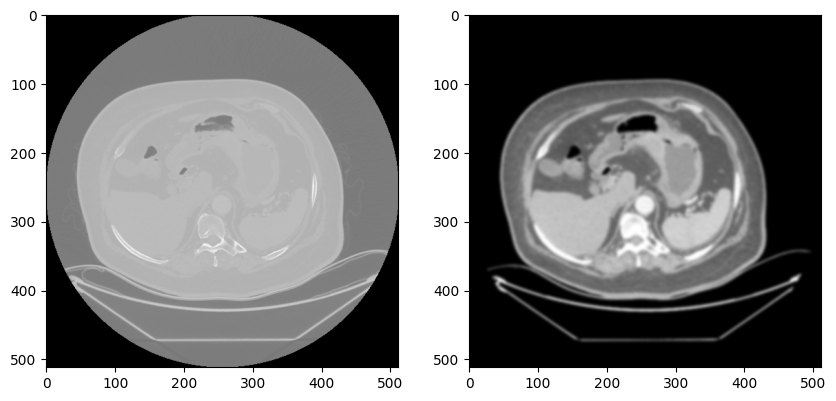

In [232]:
from PIL import Image, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import gaussian_filter


def Enhance_Image(image_array , alpha, beta):
	# Contrast Enhance
	enhanced_image_array = (np.clip(alpha * image_array + beta, 0, 65535))/256
	# enhanced_image_array = (enhanced_image_array).astype(np.uint8)
	# Gasussion Blur
	# enhanced_image_array = cv2.GaussianBlur(enhanced_image_array, (5, 5), 3).astype(np.float32)
	enhanced_image_array = gaussian_filter(enhanced_image_array, sigma=2, radius=5).astype(np.float32)
	enhanced_image_array = (enhanced_image_array - enhanced_image_array.mean()) / enhanced_image_array.std()

	# original shape
	print(f'Shape: {image_array.shape} dtype: {image_array.dtype}')
	# original min max mean std
	print(f'MIN: {image_array.min()} MAX: {image_array.max()} MEAN: {image_array.mean()} STD: {image_array.std()}')
	print('---------ENHANCED-------------')
	# enhanced shape
	print(f'Shape: {enhanced_image_array.shape} dtype: {enhanced_image_array.dtype}')
	# enhanced min max mean std
	print(f'MIN: {enhanced_image_array.min()} MAX: {enhanced_image_array.max()} MEAN: {enhanced_image_array.mean()} STD: {enhanced_image_array.std()}')

	# show two images
	plt.figure(figsize=(10, 10))
	plt.subplot(121)
	plt.imshow(image_array, cmap='gray')
	plt.subplot(122)
	plt.imshow(enhanced_image_array, cmap='gray')
	plt.show()

image = Image.open(r"D:\PostGraduate\DL\mgam_CT\data\2023_Med_CQK\img_origin\train\柏家荣\柏家荣_ImageFileName200.png")
image_array = np.array(image)
contrast = 10
brightness = -430000
Enhance_Image(image_array, contrast, brightness)
